In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/GCIcompetition1/"

train = pd.read_csv(path + 'data/train.csv')
test = pd.read_csv(path + 'data/test.csv')

In [ ]:
train

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.describe()
#test.info(

,PassengerId,Perished,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.616162,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,1.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train = train.replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
test = test.replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)

各欠損値の置き換えをmedianからmeanに変更

In [ ]:
train["Age"].fillna(train.Age.mean(), inplace=True)
train["Embarked"].fillna(train.Embarked.mode()[0], inplace=True)
test["Age"].fillna(train.Age.mean(), inplace=True)
test["Fare"].fillna(train.Fare.mean(), inplace=True)

In [ ]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Perished     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

FamilySizeで分類
https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling


In [ ]:
all_data = [train, test]

for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    #sizeごとにグルーピング
    dataset['Single'] = dataset['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    dataset['SmallF'] = dataset['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    dataset['MedF'] = dataset['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['FamilySize'].map(lambda s: 1 if s >= 5 else 0)


In [ ]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""


'Royalty'貴族を追加

In [ ]:
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev', 'Jonkheer','Don', 'Sir', 'Countess', 'Dona', 'Lady'], 'Rare')
dataset["Title"].unique()
#array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Rare'], dtype=object)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [ ]:
train

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,SmallF,MedF,LargeF,Title
0,1,1,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0.0,2,0,1,0,0,Mr
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1.0,2,0,1,0,0,Mrs
2,3,0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,1,0,0,0,Miss
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0.0,2,0,1,0,0,Mrs
4,5,1,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0.0,1,1,0,0,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,0.0,1,1,0,0,0,Rare
887,888,0,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,0.0,1,1,0,0,0,Miss
888,889,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,0.0,4,0,0,1,0,Miss
889,890,0,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,1.0,1,1,0,0,0,Mr


In [ ]:
"""#欠損値が多いのでCabinを削除
drop_column = ['Cabin']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column,axis=1,inplace=True)"""

"#欠損値が多いのでCabinを削除\ndrop_column = ['Cabin']\ntrain.drop(drop_column, axis=1, inplace = True)\ntest.drop(drop_column,axis=1,inplace=True)"

In [ ]:
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,SmallF,MedF,LargeF,Title
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,NaN,2,1,1,0,0,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,NaN,0,2,0,1,0,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,NaN,2,1,1,0,0,0,Mr
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,0,1,1,0,0,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,0,3,0,0,1,0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,29.699118,0,0,A.5. 3236,8.0500,NaN,0,1,1,0,0,0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,1,1,1,0,0,0,Rare
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,1,0,0,0,Mr
416,1308,3,"Ware, Mr. Frederick",0,29.699118,0,0,359309,8.0500,NaN,0,1,1,0,0,0,Mr


Agebin,Farebinを削除

In [ ]:
"""for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
"""

"for dataset in all_data:\n    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])\n"

In [ ]:
"""
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])
"""

"\nfor dataset in all_data:\n    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',\n                                                                                      'Average_fare','high_fare'])\n"

In [ ]:
traindf = train
testdf = test

all_dat=[traindf,testdf]

for dataset in all_dat:
    drop_column = ['Name','Ticket',"Cabin"]
    dataset.drop(drop_column, axis=1, inplace = True)

drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)

In [ ]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title"],
                             prefix=["Sex","Title"])
testdf = pd.get_dummies(testdf, columns = ["Sex","Title"],
                             prefix=["Sex","Title"])

In [ ]:
testdf.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'Single', 'SmallF', 'MedF', 'LargeF', 'Sex_0', 'Sex_1',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

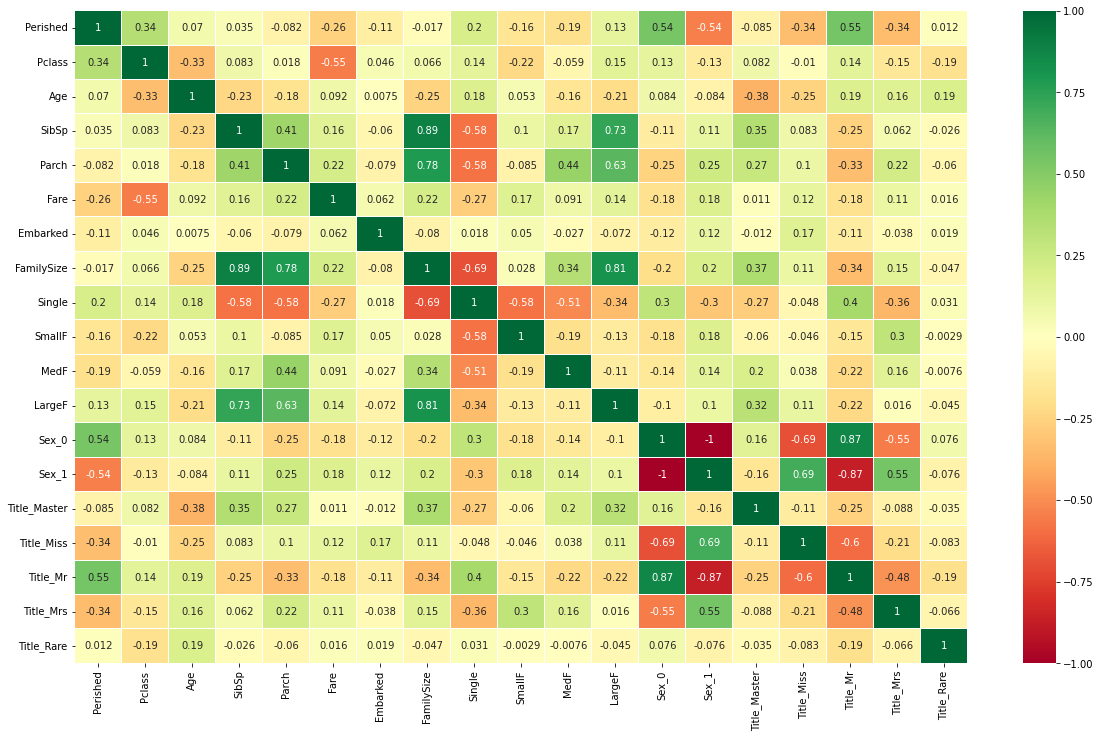

In [ ]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()


XGBoostを利用して予測

In [ ]:
#必要なライブラリのインストール
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import re
import lightgbm as lgb
from sklearn.metrics import accuracy_score



In [ ]:
y_train=traindf['Perished']
X_train=traindf.drop('Perished',1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
X_val.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize',
       'Single', 'SmallF', 'MedF', 'LargeF', 'Sex_0', 'Sex_1', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [ ]:
xs_test = testdf.iloc[:,1:]
xs_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize',
       'Single', 'SmallF', 'MedF', 'LargeF', 'Sex_0', 'Sex_1', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val)

パラメータ更新

In [ ]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2'},
    'num_leaves': 200,
    'learning_rate': 0.003,
    'num_iterations':100,
    'feature_fraction': 0.52,
    'bagging_fraction': 0.79,
    'bagging_freq': 7,
    'verbose': 0
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5000,
                valid_sets=lgb_eval,
                early_stopping_rounds=1000)


[1]	valid_0's l2: 0.241858
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's l2: 0.241357
[3]	valid_0's l2: 0.240923
[4]	valid_0's l2: 0.240269
[5]	valid_0's l2: 0.239653
[6]	valid_0's l2: 0.239157
[7]	valid_0's l2: 0.238531
[8]	valid_0's l2: 0.237956
[9]	valid_0's l2: 0.237628
[10]	valid_0's l2: 0.237156
[11]	valid_0's l2: 0.236614
[12]	valid_0's l2: 0.235951
[13]	valid_0's l2: 0.235319
[14]	valid_0's l2: 0.234705
[15]	valid_0's l2: 0.234259
[16]	valid_0's l2: 0.233755
[17]	valid_0's l2: 0.233182
[18]	valid_0's l2: 0.232598
[19]	valid_0's l2: 0.232071
[20]	valid_0's l2: 0.231465
[21]	valid_0's l2: 0.231019
[22]	valid_0's l2: 0.230435
[23]	valid_0's l2: 0.229829
[24]	valid_0's l2: 0.229401
[25]	valid_0's l2: 0.228963
[26]	valid_0's l2: 0.228367
[27]	valid_0's l2: 0.227943
[28]	valid_0's l2: 0.227467
[29]	valid_0's l2: 0.226874
[30]	valid_0's l2: 0.226268
[31]	valid_0's l2: 0.225938
[32]	valid_0's l2: 0.225352
[33]	valid_0's l2: 0.224789
[34]	valid_0's l2: 0.

In [ ]:
# valid_xについて推論
oof = (gbm.predict(X_val) > 0.5).astype(int)
print('スコア：', round(accuracy_score(y_val, oof)*100,2))


スコア： 69.15


In [ ]:
# testについて予測
test_pred = (gbm.predict(xs_test) > 0.5).astype(int)
# 二値に分類する
my_prediction = (test_pred > 0.5).astype(int)

# 元のテストデータからPassengerIdを取得
PassengerId = np.array(testdf["PassengerId"]).astype(int)
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Perished"])
my_solution.to_csv('/content/drive/My Drive/Colab Notebooks/GCIcompetition1/data/submission.csv', index=False)

In [ ]:
my_solution.to_csv('/content/drive/My Drive/Colab Notebooks/GCIcompetition1/data/submission.csv', index=False)